In [177]:
import pandas as pd 
from collections import OrderedDict
import pickle
df = pd.read_pickle("features.pickle")
df.head()

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day),year,month,day,days_since_last_event,DateofServiceRequested,diff_minutes,days_sincelast_event,DateofBooking,latest_cart,labels,thirty,ninty
0,BBCHH,1,2018-05-20,2018-05-21,D,14,2018,5,20,NaT,2018-05-21,1 days,0.0,2018-05-20,"[2018-05-20 00:00:00, 2018-09-23 00:00:00]",126.0,0,0
1,CHWFD,1,2018-09-23,2018-09-23,C,8,2018,9,23,126 days,2018-09-23,0 days,126.0,2018-09-23,"[2018-05-20 00:00:00, 2018-09-23 00:00:00]",0.0,0,0
2,DYDMF,2,2018-11-10,2018-11-13,C,11,2018,11,10,NaT,2018-11-13,3 days,0.0,2018-11-10,[2018-11-10 00:00:00],0.0,0,0
3,EZYSA,3,2018-04-12,2018-04-16,B,8,2018,4,12,NaT,2018-04-16,4 days,0.0,2018-04-12,"[2018-04-12 00:00:00, 2018-08-05 00:00:00]",115.0,0,0
4,HWAKX,3,2018-08-05,2018-08-06,B,11,2018,8,5,115 days,2018-08-06,1 days,115.0,2018-08-05,"[2018-04-12 00:00:00, 2018-08-05 00:00:00]",0.0,0,0


In [178]:
monthuuser=df.groupby(['month']).agg(OrderedDict( [('Profile ID','nunique')]))
monthuuser

,Profile ID
month,
1,2324
2,2115
3,2248
4,2188
5,2189
6,2241
7,2290
8,2228
9,2200


In [180]:
monthuuser.reset_index(level=['month'],inplace=True)


In [182]:
monthuuser=pd.DataFrame(monthuuser)

In [185]:
monthuuser.rename(columns={'Profile ID':'frequency'},inplace=True)`

1.Plot new users acquired every month on a bar chart (New user in a month = a customer who has placed a request for the first time in this month)

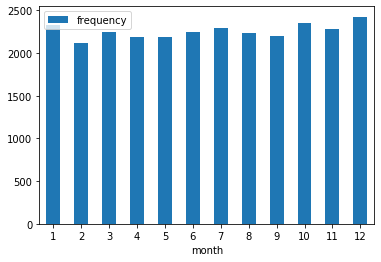

In [188]:

import matplotlib.pyplot as plt
 #df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
ax = monthuuser.plot.bar(x='month', y='frequency', rot=0)
ax

In [152]:
z=df.groupby(['month'],as_index=False)[('Profile ID'),('thirty')]
zz=z.get_group(1)
df_jan = pd.DataFrame(zz) 
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2675 entries, 6 to 30937
Data columns (total 2 columns):
Profile ID    2675 non-null int64
thirty        2675 non-null int64
dtypes: int64(2)
memory usage: 62.7 KB


"2. Day repeat rate is defined as percentage of new users who have placed a 2nd order within 30 days of placing their first order.
Q. What is the 30-day repeat rate of users acquired in December 2017?"

In [166]:
dff=df.groupby(['month'],as_index=False)[('Profile ID'),('thirty')]
dec_group=dff.get_group(12)
df_dec = pd.DataFrame(dec_group) 
dec_df= df_dec.drop_duplicates(subset='Profile ID', keep='first')
total_customers=len(dec_df.index)
print(total_customers)
repeat_customers=dec_df['thirty'].sum()
print(repeat_customers)
dec_30=repeat_customers/total_customers
print(dec_30)

2424
396
0.16336633663366337


16.163366 % of  of new users who have placed order in December will a 2nd order within 30 days of placing their first order.


3.What is the 90-day repeat rate of users acquired in Jan,Feb,March 2018?

In [171]:
dff=df.groupby(['month'],as_index=False)[('Profile ID'),('ninty')]
jan_group=dff.get_group(1)
df_jan = pd.DataFrame(jan_group) 
jan_df= df_jan.drop_duplicates(subset='Profile ID', keep='first')
total_customers=len(jan_df.index)
print(total_customers)
repeat_customers=jan_df['ninty'].sum()
print(repeat_customers)
jan_90=repeat_customers/total_customers
jan_90

2324
750


0.3227194492254733

32.227 % of  of new users who have placed order in Jan will plce a 2nd order within 90 days of placing their first order.


In [189]:
dff=df.groupby(['month'],as_index=False)[('Profile ID'),('ninty')]
feb_group=dff.get_group(2)
df_feb = pd.DataFrame(feb_group) 
feb_df= df_feb.drop_duplicates(subset='Profile ID', keep='first')
total_customers=len(feb_df.index)
print(total_customers)
repeat_customers=feb_df['ninty'].sum()
print(repeat_customers)
feb_90=repeat_customers/total_customers
feb_90

2115
700


0.3309692671394799

33.1 % of of new users who have placed order in Feb will plce a 2nd order within 90 days of placing their first order.

In [174]:
dff=df.groupby(['month'],as_index=False)[('Profile ID'),('ninty')]
mar_group=dff.get_group(3)
df_mar = pd.DataFrame(mar_group) 
mar_df= df_mar.drop_duplicates(subset='Profile ID', keep='first')
total_customers=len(mar_df.index)
print(total_customers)
repeat_customers=mar_df['ninty'].sum()
print(repeat_customers)
mar_90=repeat_customers/total_customers
mar_90

2248
730


0.32473309608540923

32.4733 % of  of new users who have placed order in March will a 2nd order within 90 days of placing their first order.


THANK YOU !